# Lesson 2 Assignment - Data Visualization Complementary Views 

## Author - Rodolfo Lerma



## Instructions
1. Create different complementary views of data by applying multiple chart types and aesthetics.
2. Project multiple dimensions using conditioning or faceting (e.g., small multiples) on both categorical and numeric variables.

A certain casino has contracted your team to determine if there are any patterns among their tables and patron attendance. They are not asking for prediction, just for a description of what is already there.

Now that we have studied different plot types and their usefulness in determining what is available in the data. Use the Jitter Head Count data set to find and report on interesting relationships in the data.

In [3]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

## First look at the data

In [4]:
# Load data
filename = 'https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/JitteredHeadCount.csv'
headcount_df = pd.read_csv(filename)
headcount_df.dtypes

GameCode        object
DateFormat      object
Hour             int64
TablesOcc        int64
TablesOpen       int64
TablesClosed     int64
HeadCount        int64
DayOfWeek        int64
DayNumber        int64
dtype: object

`GameCode` & `DateFormat` are the only 2 variables that are not considered numeric

In [3]:
#Check the shape of the data array
headcount_df.shape

(175677, 9)

**Summary:**
- The data set contains 175,677 rows.
- The data set has 9 variables (columns).
- 7 of the 9 columns are numeric (int64) and 2 are considered No Numeric (string and date)

In [4]:
headcount_df.describe()

,Hour,TablesOcc,TablesOpen,TablesClosed,HeadCount,DayOfWeek,DayNumber
count,175677.000000,175677.000000,175677.000000,175677.000000,175677.000000,175677.000000,175677.000000
mean,11.504431,2.074591,2.555804,1.853430,7.390228,3.992953,183.434303
std,6.922330,3.307518,3.673229,2.993767,12.458613,1.997989,105.702167
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,6.000000,0.000000,1.000000,0.000000,0.000000,2.000000,92.000000
50%,12.000000,1.000000,1.000000,1.000000,3.000000,4.000000,183.000000
75%,18.000000,2.000000,3.000000,3.000000,8.000000,6.000000,275.000000
max,23.000000,24.000000,24.000000,23.000000,109.000000,7.000000,366.000000


## Examine the data frame

In [5]:
headcount_df.head()

,GameCode,DateFormat,Hour,TablesOcc,TablesOpen,TablesClosed,HeadCount,DayOfWeek,DayNumber
0,BA,9/16/2011,6,0,0,1,0,6,47
1,BA,9/16/2011,7,0,0,1,0,6,47
2,BA,9/16/2011,8,0,0,1,0,6,47
3,BA,9/16/2011,9,0,0,1,0,6,47
4,BA,9/16/2011,10,0,1,0,0,6,47


In [6]:
headcount_df.tail()

,GameCode,DateFormat,Hour,TablesOcc,TablesOpen,TablesClosed,HeadCount,DayOfWeek,DayNumber
175672,WR,10/31/2011,19,0,0,1,0,2,92
175673,WR,10/31/2011,20,1,1,0,1,2,92
175674,WR,10/31/2011,21,0,1,0,0,2,92
175675,WR,10/31/2011,22,1,1,0,1,2,92
175676,WR,10/31/2011,23,0,1,0,0,2,92


After a quick first look it seems the data is divided by `GameCode`.

In [5]:
#Transforming the variable DateFormat into DateTime variable
headcount_df.loc[:, 'DateFormat'] = pd.to_datetime(headcount_df.loc[:, 'DateFormat'])
headcount_df.set_index('DateFormat', inplace = True)

## Histogram for Numeric Variables

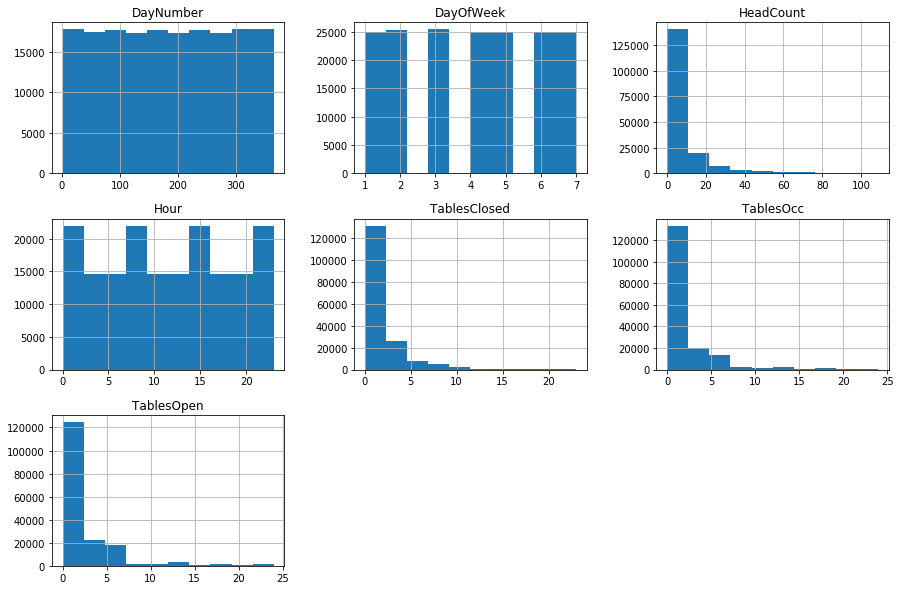

In [8]:
headcount_df.hist(figsize = (15,10))
plt.show()

This first look to the Numeric variables allows us to see some initial characteristics of the data. As a reminder here we are seeing all the data combined by `GameCode` and we need to explore if the distribution we are seeing is the same for each value of `GameCode`.

## Correlation

In this part of the analysis a quick correlation analysis is provided to spot any correlated values that might lead to useful insights from the data.

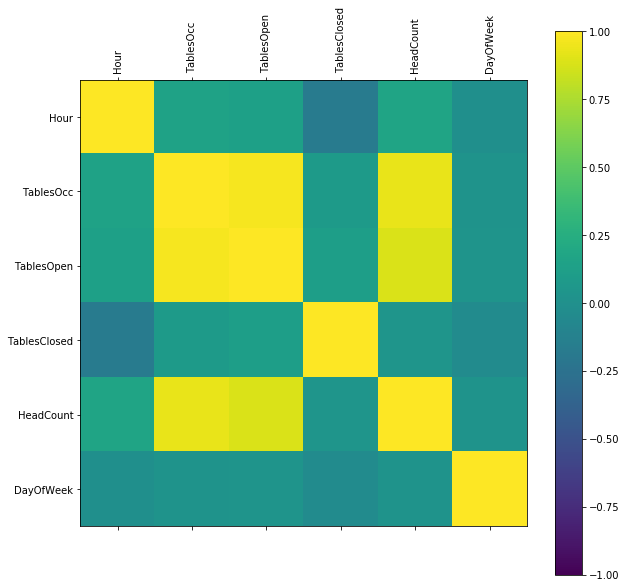

In [9]:
cols = ['Hour','TablesOcc','TablesOpen','TablesClosed','HeadCount','DayOfWeek']
correlations = headcount_df[cols].corr()
# plot correlation matrix
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,6,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(cols,rotation = 90)
ax.set_yticklabels(cols)
plt.show()

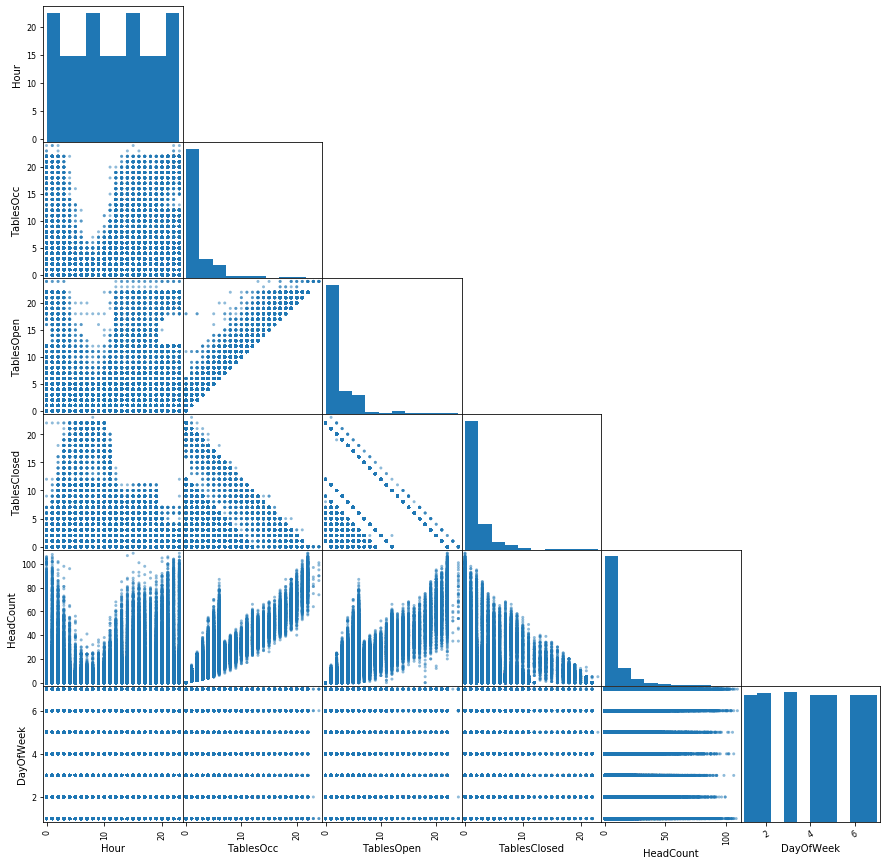

In [10]:
axes = scatter_matrix(headcount_df[cols], figsize = (15,15),diagonal='hist', alpha=0.5)

for i in range(np.shape(axes)[0]):
    for j in range(np.shape(axes)[1]):
        if i < j:
            axes[i,j].set_visible(False)
            
plt.xticks(rotation=30)
plt.yticks(rotation=45)
plt.show()

Some initial insights from the data are seen:
- From `HeadCount` Vs `TablesOcc` & `TablesOpen` it is possible to see that they behave pretty much in the same way, with exception of the lower values where it is possible to see a _Delta_ between the 2. Being the `TablesOpen` the one with larger distribution along the Y axis (`HeadCount`).
- It seems to be an hour when we have the lower number of people playing any particular game (around 10 AM)
- Also it is possible to see that day to is the one with a little bit lower `HeadCount` compared with other days.

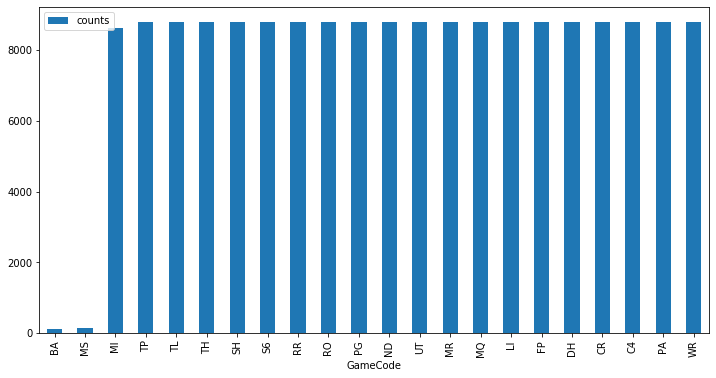

In [11]:
#Count the number of rows for each GameCode and plot the count grouped by GameCode
headcount_df['counts'] = 1
headcount_df.loc[:, ['GameCode', 'counts']].groupby(['GameCode']).agg('count').sort_values('counts').plot.bar(figsize=(12,6))

From here it is possible to see that each game has the same numbers except for BA & MS. Not that each game was played the same number of times, but rather that the the Table for each game contains the same number of rows for virtually almost all the games, except for the 2 games mentioned before (Pretty much what we have is an assemble of multiple tables where Game Code was the Group Factor).

_Note: This seems to be more related to a data recollection problem._

## Looking into some multiple variables

### Tables Time Series

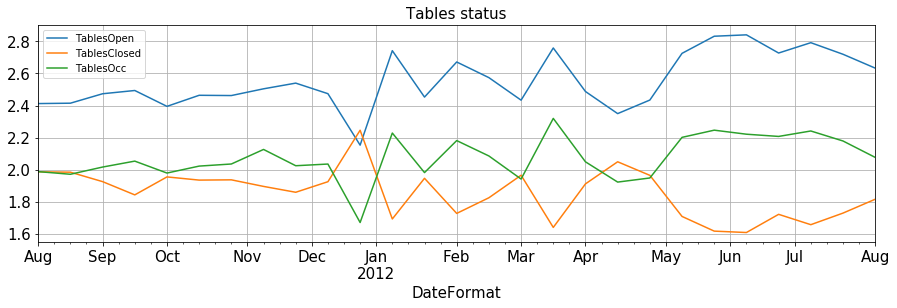

In [6]:
#Time series plot for Tables: Open, Closed and Occupied.
#To minimize the noise each data point seen here is the mean of a 2 Weeks sample
headcount_df[["TablesOpen", "TablesClosed", "TablesOcc"]].resample("2W").mean().plot(figsize=(15,4))
plt.tick_params(axis="x", labelsize=15)
plt.tick_params(axis="y", labelsize=15)
plt.xlabel('DateFormat', fontsize = 15)
plt.title('Tables status',fontsize=15)
plt.legend(loc='upper left', fontsize=10)
plt.grid(True)

It is possible to see what it was expected:
- `TablesClosed` and `TablesOpen` seem to be a mirror of each other (the more tables closed the less tables open we can have)
- `TablesOcc` seems to be in the middle, a little bit closer to the `TablesClosed` line. It is possible to see a delta (difference) of about 0.4 tables in average `TablesOcc` & `TablesOpen`, this maybe as a conservative approach to allow the player to see a little bit more options than what we is actually going to use.

### HeadCount Vs Hour (Hue GameCode)

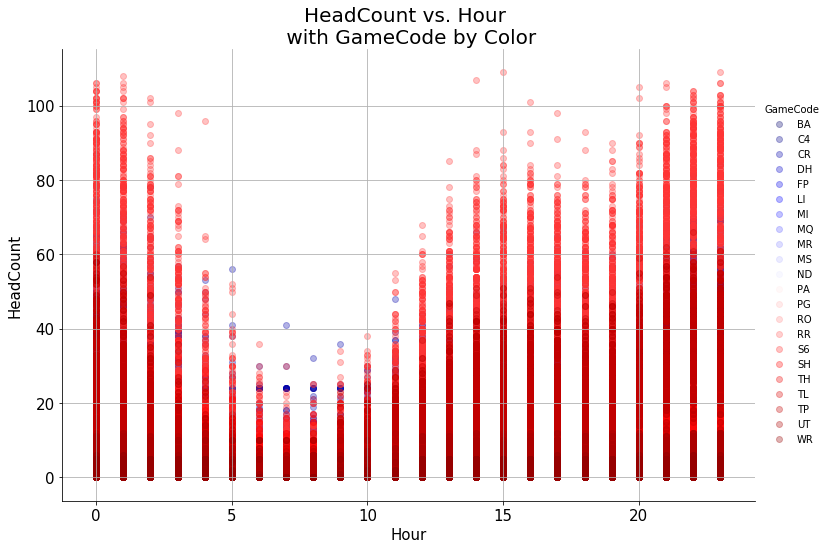

In [13]:
#Scatter plot for HeadCount Vs Hour with GameCode by Color
sns.lmplot(x = 'Hour', y = 'HeadCount', 
           data = headcount_df, 
           hue = "GameCode", 
           palette="seismic", 
           scatter_kws={'alpha':0.3},height=7, aspect=1.5,
           fit_reg = False)
plt.xlabel('Hour', fontsize = 15)
plt.ylabel('HeadCount',fontsize = 15)
plt.title('HeadCount vs. Hour \n with GameCode by Color', fontsize = 20)
plt.tick_params(axis="x", labelsize=15)
plt.tick_params(axis="y", labelsize=15)
plt.grid(True)

No clear group is seen here, but it is clear that from 5AM to 10AM we have the lowest `HeadCount` numbers.

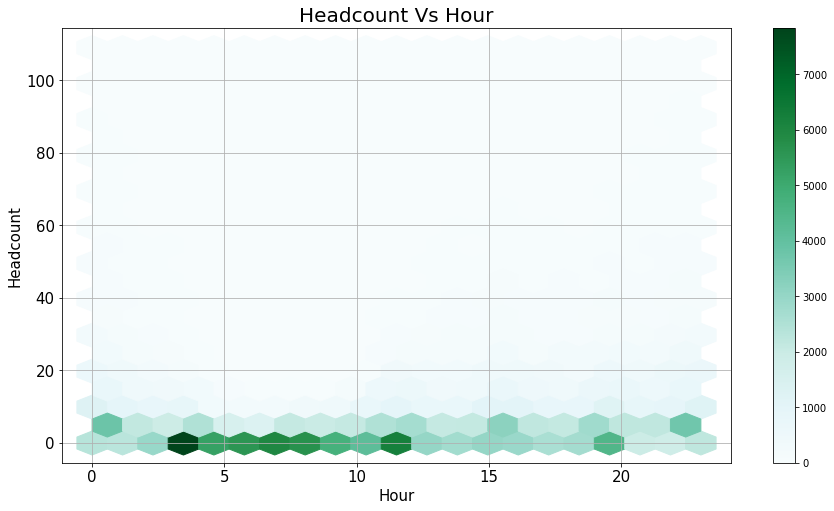

In [14]:
#Hexbin plot HeadCount Vs Hour
ax = plt.figure(figsize=(15, 8)).gca() # define axis
headcount_df.plot.hexbin(x = 'Hour', y = 'HeadCount', gridsize = 20, ax = ax)
ax.set_title('Headcount Vs Hour', fontsize = 20) # Give the plot a main title
ax.set_ylabel('Headcount', fontsize = 15)# Set text for y axis
ax.set_xlabel('Hour', fontsize = 15)
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
ax.grid(True)

It is noticeable that most of the HeadCount Concentration is around from 1-5 peoples at any time in a particular table, followed by 6-10 and then a small number of people above the 15 people line.

In [15]:
#New variable was created: Hour Bin (6 bins, therefore each bin includes a 4 hrs range)
headcount_df.loc[:, 'hour_bin'] = pd.cut(headcount_df.loc[:, 'Hour'], bins = 6, labels = range(6))

### HeadCount Vs GameCode (Hue: Hour Bin)

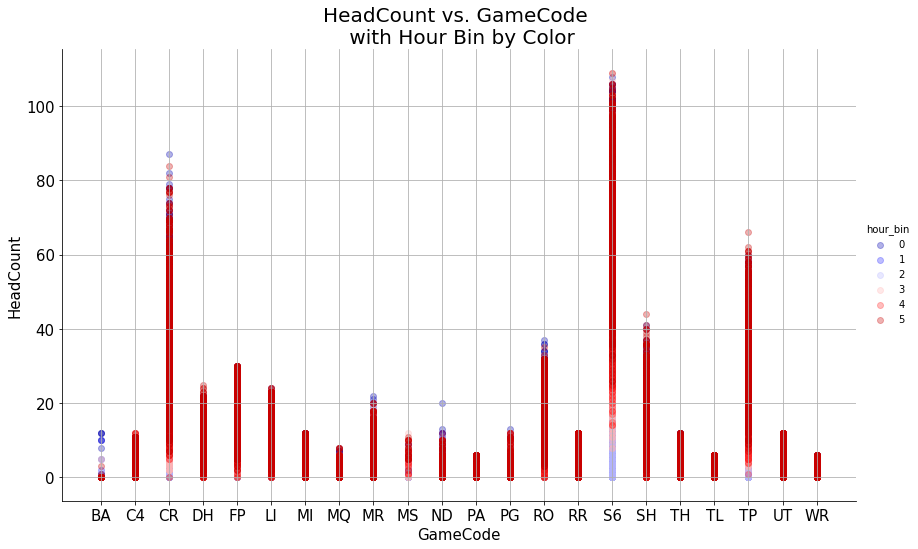

In [16]:
#Scatter plot for HeadCount Vs GameCode (more like a bar plot) with Hour Bin by Color
sns.lmplot(x = 'GameCode', y = 'HeadCount', 
           data = headcount_df, 
           hue = "hour_bin", 
           palette="seismic", 
           scatter_kws={'alpha':0.3},
           height=7, aspect=1.7, #This line controls the size of the plot
           fit_reg = False)

plt.xlabel('GameCode', fontsize = 15)
plt.ylabel('HeadCount', fontsize = 15)
plt.title('HeadCount vs. GameCode \n with Hour Bin by Color', fontsize = 20)
plt.tick_params(axis="x", labelsize=15)
plt.tick_params(axis="y", labelsize=15)
plt.grid(True)

From here it is possible to see some of the most popular games as well as the less popular ones.
- Popular: S6, CR, TP, SH & RO
- Less popular: PA, TL, WR & MQ

### Head Count Vs Day of the Week

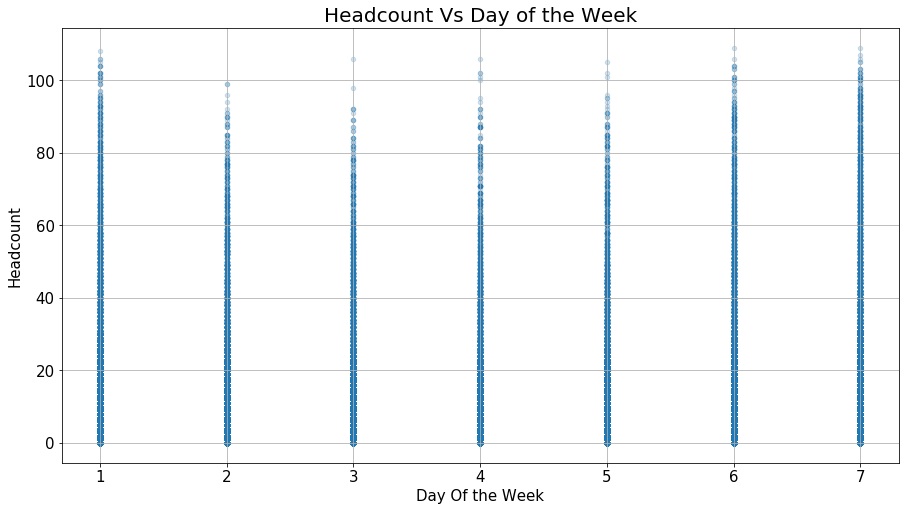

In [17]:
#Scatter plot (which looks more like a bar plot) for HeadCount Vs Day of the Week
ax = plt.figure(figsize=(15, 8)).gca() # define axis
headcount_df.plot.scatter(x = 'DayOfWeek', y = 'HeadCount', ax = ax, alpha = 0.2)
ax.set_title('Headcount Vs Day of the Week', fontsize = 20) # Give the plot a main title
ax.set_ylabel('Headcount', fontsize = 15)# Set text for y axis
ax.set_xlabel('Day Of the Week', fontsize = 15)
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
ax.grid(True)

From this figure it is possible to clarify that day 3 is the lowest in the number of `HeadCount`. Meaning: During this day there are less tables with 80 people of more at any given time. This could be an indication that this day is less popular than the rest (but the idea needs to be explore with more detail)

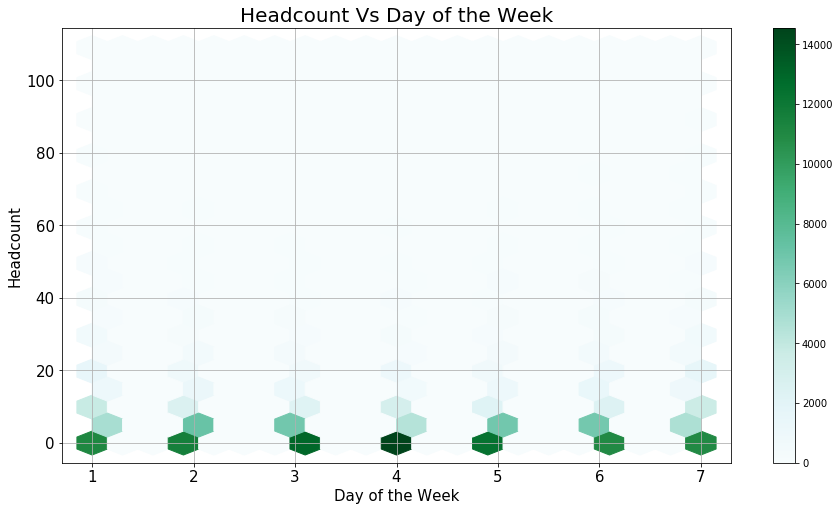

In [18]:
#Hexbin Plot for HeadCount Vs Day of the Week
ax = plt.figure(figsize=(15, 8)).gca() # define axis
headcount_df.plot.hexbin(x = 'DayOfWeek', y = 'HeadCount', gridsize = 20, ax = ax)
ax.set_title('Headcount Vs Day of the Week', fontsize = 20) # Give the plot a main title
ax.set_ylabel('Headcount', fontsize = 15)# Set text for y axis
ax.set_xlabel('Day of the Week', fontsize = 15)
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
ax.grid(True)

As it was seen before (HeadCount Vs Hour) the highest concentration is in the tables/games for 1-5 people followed by 6-10 (approx). 

### FaceGrid: HeadCount Vs Day of the Week

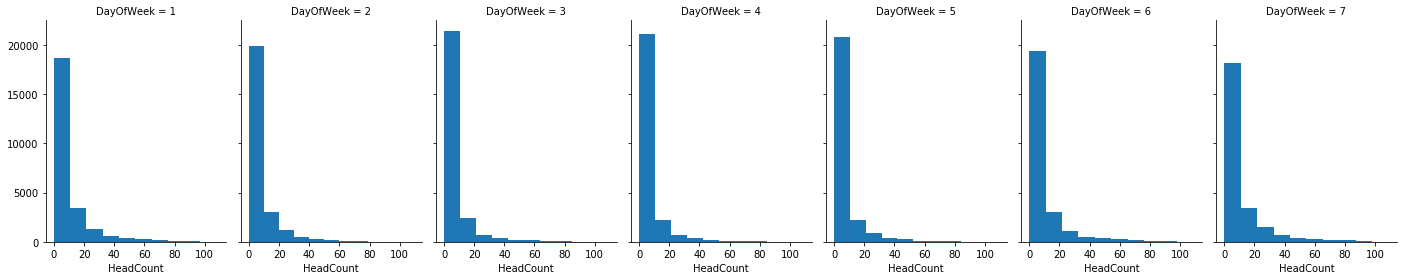

In [19]:
# FaceGrid of HeadCount Divided by Day of the Week
gr = sns.FacetGrid(headcount_df, col="DayOfWeek", height=4, aspect=0.7)
gr = gr.map(plt.hist, "HeadCount")

Is there any day where the distribution is different from the rest?

No, there are days where the `HeadCount` is higher in the 1-20 range, but apart from that all of them look the same.

### FaceGrid: HeadCount Vs Day of the Week (rows) & Hour Bin (col)

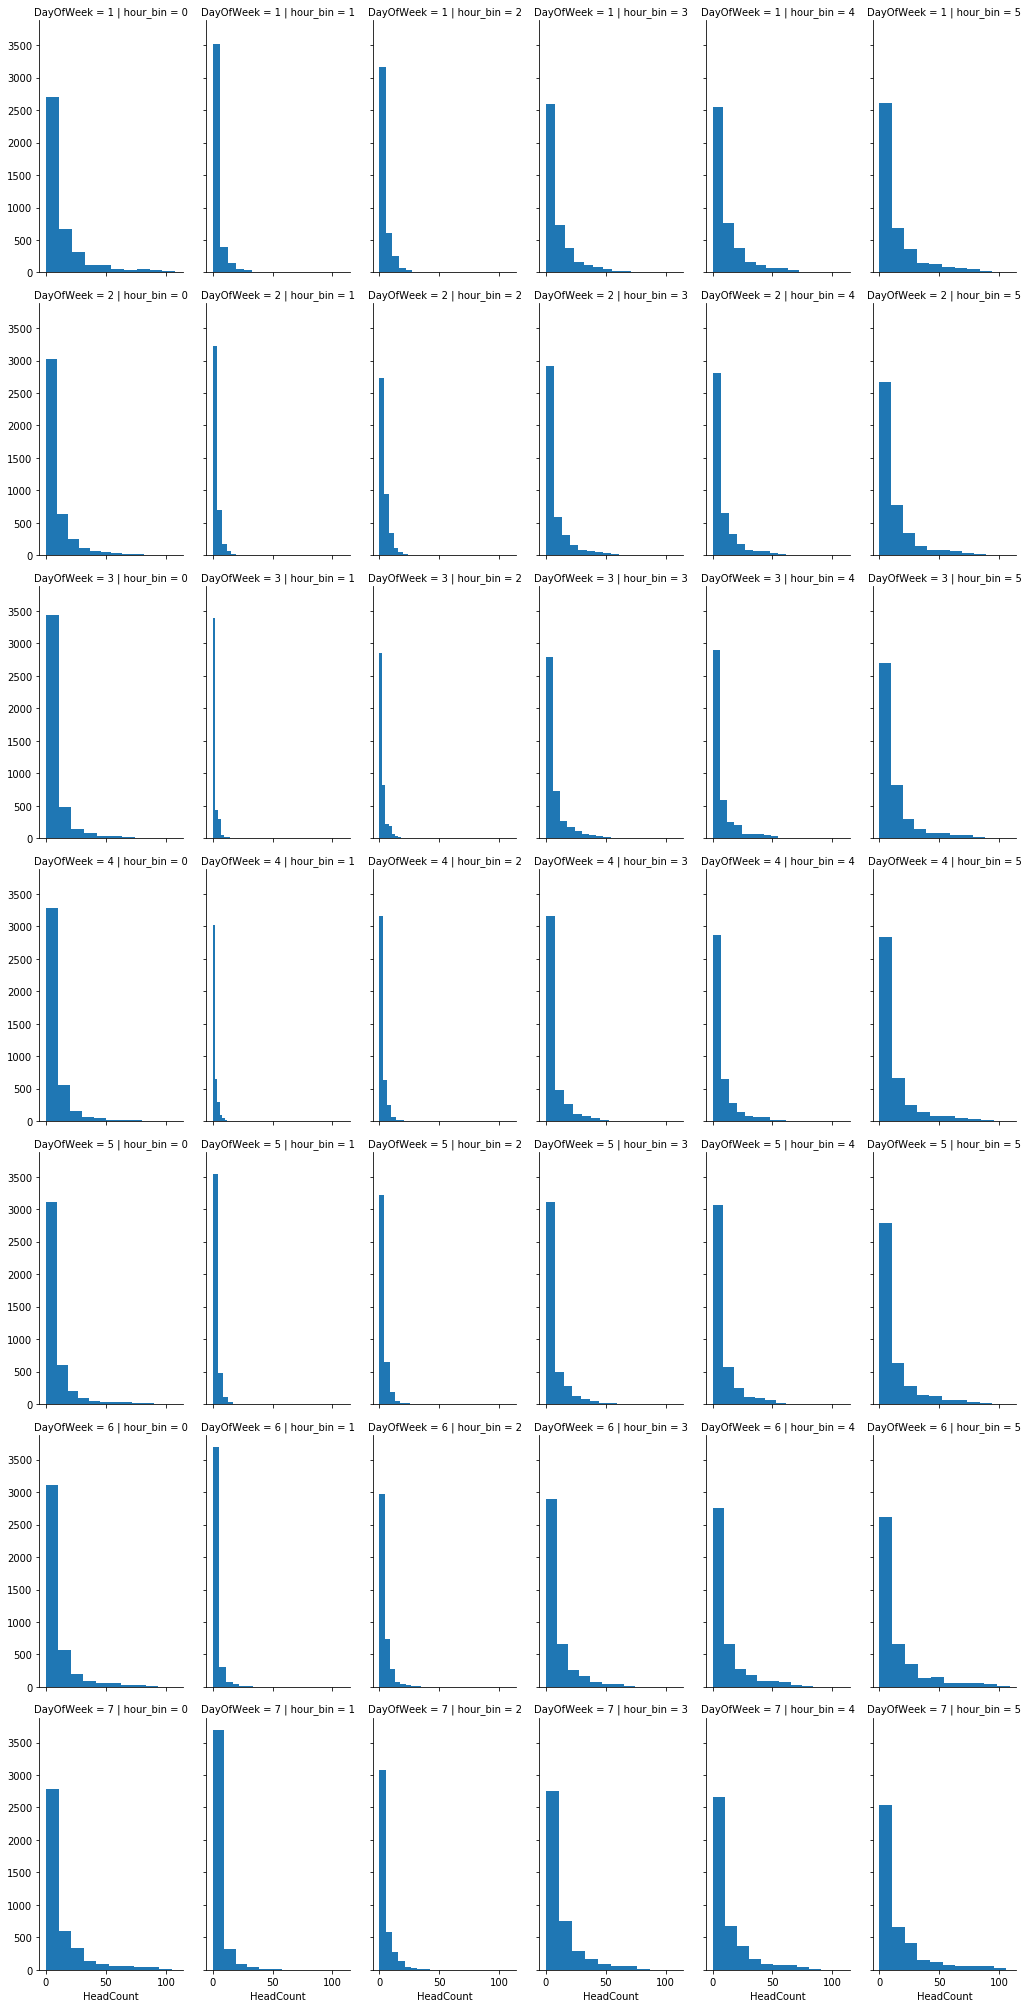

In [20]:
# FaceGrid of HeadCount Divided by Day of the Week (Rows) & Hour Bin (col)
gr = sns.FacetGrid(headcount_df, col="hour_bin",row = 'DayOfWeek', height=4, aspect=0.6)
gr = gr.map(plt.hist, "HeadCount")


### Histogram for HeadCount grouped by GameCode, Hour Bin & Day Of the Week

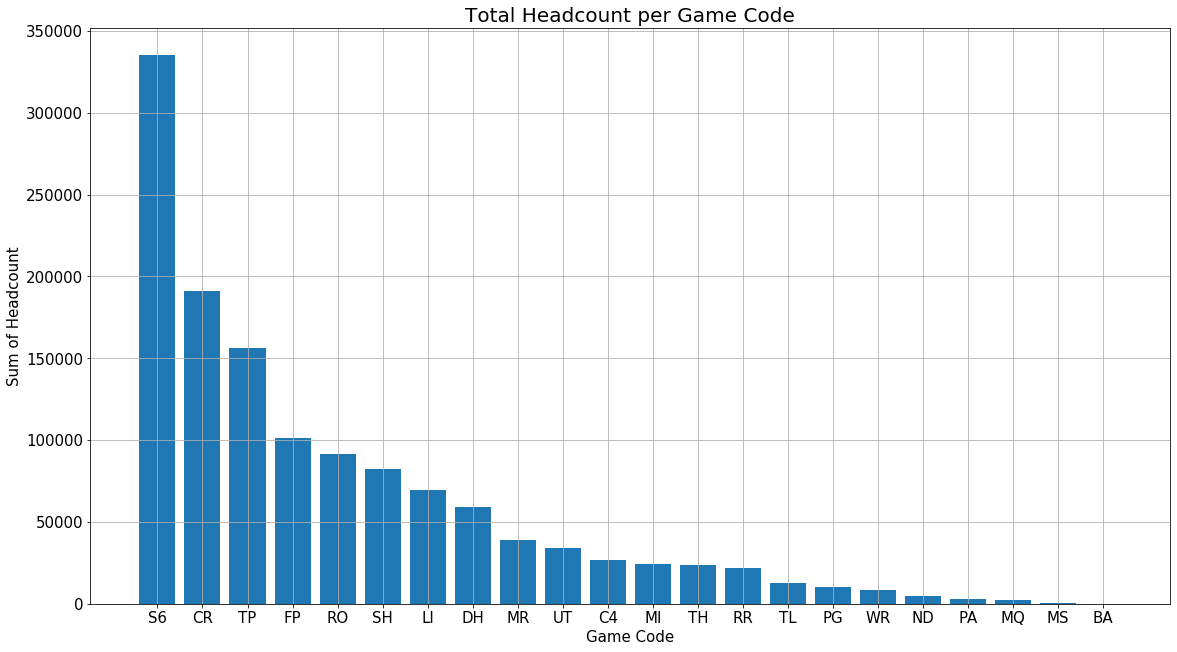

In [21]:
#Group HeadCount by GameCode by adding all the HeadCount values
y = headcount_df.groupby('GameCode')['HeadCount'].sum().reset_index().sort_values('HeadCount', ascending = False)

#Plot Sum of HeadCount Vs GameCode
fig = plt.figure(figsize=(15,8))
ax = fig.add_axes([0,0,1,1])
ax.bar(y['GameCode'],y['HeadCount'])
ax.set_title('Total Headcount per Game Code', fontsize = 20) # Give the plot a main title
ax.set_ylabel('Sum of Headcount', fontsize = 15)# Set text for y axis
ax.set_xlabel('Game Code', fontsize = 15)
ax.tick_params(axis="y", labelsize=15)
ax.tick_params(axis="x", labelsize=15)
ax.grid(True)


We can see from the most popular game to the least.
S6 is the most popular game, followed by CR and TP and FP

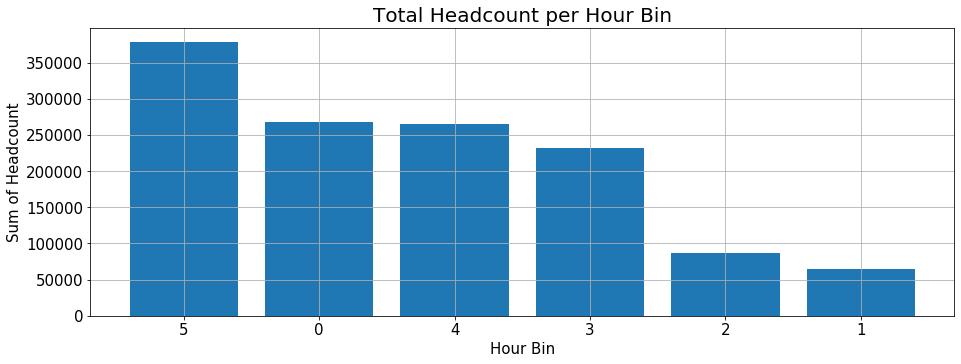

In [22]:
#Create a Column where the day of the week is a String a not a Number
headcount_df.loc[:, 'hour_bin_c'] = headcount_df['hour_bin'].astype(str)

#Group HeadCount by Hour Bin (by summation of all the HeadCount Values)
y = headcount_df.groupby('hour_bin_c')['HeadCount'].sum().reset_index().sort_values('HeadCount', ascending = False)

#Plot Sum HeadCount (Total) Vs Hour Bin
fig = plt.figure(figsize=(12,4))
ax = fig.add_axes([0,0,1,1])
ax.bar(y['hour_bin_c'],y['HeadCount'])
ax.set_title('Total Headcount per Hour Bin', fontsize = 20) # Give the plot a main title
ax.set_ylabel('Sum of Headcount', fontsize = 15)# Set text for y axis
ax.set_xlabel('Hour Bin', fontsize = 15)
ax.tick_params(axis="y", labelsize=15)
ax.tick_params(axis="x", labelsize=15)
ax.grid(True)

From here it is possible to see that people prefer to play at nigh 8 PM to 12 AM, followed by the early morning 12 AM to 4 AM.

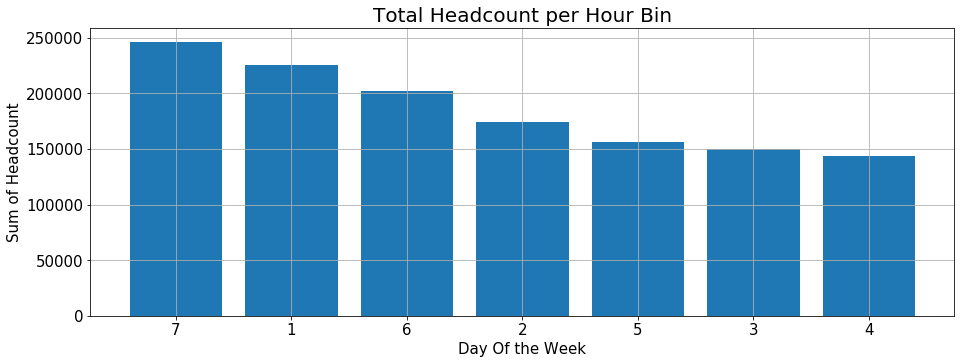

In [23]:
#Create a Column where the day of the week is a String a not a Number
headcount_df.loc[:, 'DayOfWeek_C'] = headcount_df['DayOfWeek'].astype(str)

#Group HeadCount by adding all the values by Day of the Week (the variable that was created above) 
y = headcount_df.groupby('DayOfWeek_C')['HeadCount'].sum().reset_index().sort_values('HeadCount', ascending = False)

#Plot Sum of HeadCount Vs Day of the Week
fig = plt.figure(figsize=(12,4))
ax = fig.add_axes([0,0,1,1])
ax.bar(y['DayOfWeek_C'],y['HeadCount'])
ax.set_title('Total Headcount per Hour Bin', fontsize = 20) # Give the plot a main title
ax.set_ylabel('Sum of Headcount', fontsize = 15)# Set text for y axis
ax.set_xlabel('Day Of the Week', fontsize = 15)
ax.tick_params(axis="y", labelsize=15)
ax.tick_params(axis="x", labelsize=15)
ax.grid(True)

From here is possible to see that the most popular day is Sunday and Monday

### Heat Map for Hour Bin Vs HeadCount grouped by GameCode

Text(0.5, 1.0, 'HeadCount Total by Hour Bin and GameCode')

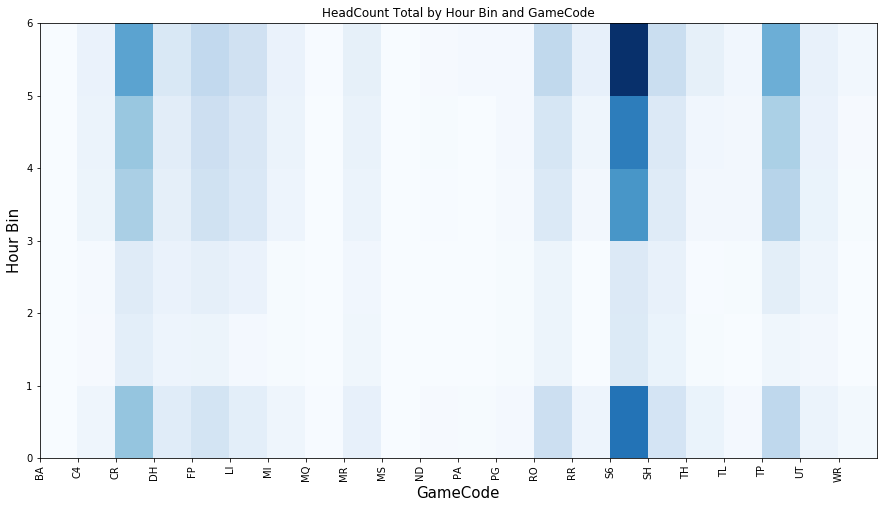

In [24]:
#Crosstab of Sum HeadCount (Total) per Hour Bin and GameCode 
x = pd.crosstab(headcount_df['hour_bin'], headcount_df['GameCode'], values=headcount_df['HeadCount'], aggfunc='sum', normalize=True)
#sns.heatmap(x,cmap="YlGnBu", annot=False, cbar=False)
#Heat Map Plot
ax = plt.figure(figsize=(15, 8)).gca() # define axis
ax.pcolor(x, cmap = 'Blues')
ax.set_xticks(range(x.shape[1]))
ax.set_xticklabels(x.columns, rotation=90)
ax.set_xlabel('GameCode', fontsize = 15)
ax.set_ylabel('Hour Bin', fontsize = 15)
ax.set_title('HeadCount Total by Hour Bin and GameCode')

It is possible to see what was seen before: The most popular game is S6 and most popular times are at Night and Early Morning

### Heat Map for Day of the Week Vs HeadCount grouped by GameCode

Text(0.5, 1.0, 'HeadCount Total by DayOfWeek and GameCode')

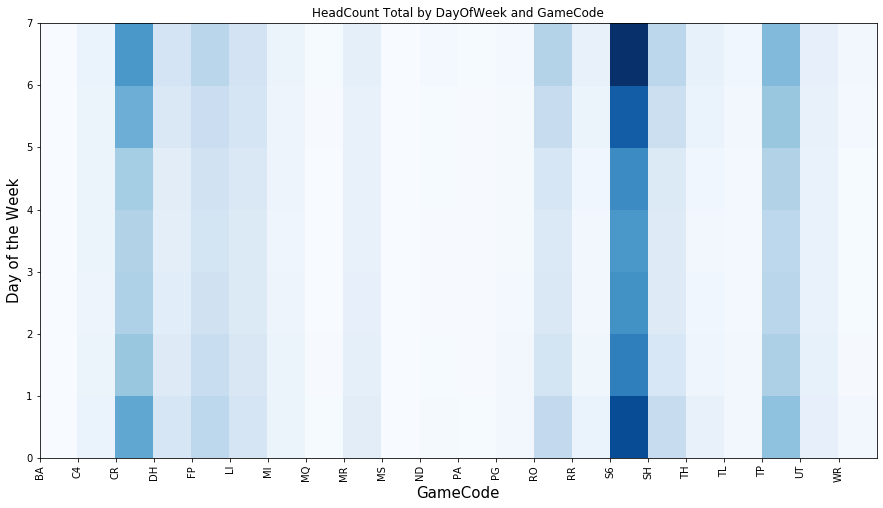

In [25]:
#Crosstab of Sum HeadCount (Total) per DayOfWeek and GameCode 
y = pd.crosstab(headcount_df['DayOfWeek'], headcount_df['GameCode'], values=headcount_df['HeadCount'], aggfunc='sum', normalize=True)
#sns.heatmap(y,cmap="BuPu", annot=False, cbar=False)
ax = plt.figure(figsize=(15, 8)).gca() # define axis
ax.pcolor(y, cmap = 'Blues')
ax.set_xticks(range(y.shape[1]))
ax.set_xticklabels(y.columns, rotation=90)
ax.set_xlabel('GameCode', fontsize = 15)
ax.set_ylabel('Day of the Week', fontsize = 15)
ax.set_title('HeadCount Total by DayOfWeek and GameCode')

It is possible to see what was seen before: The most popular game is S6 and most popular day of the week is Sunday followed by Monday.

## Time Line for HeadCount by Game Code

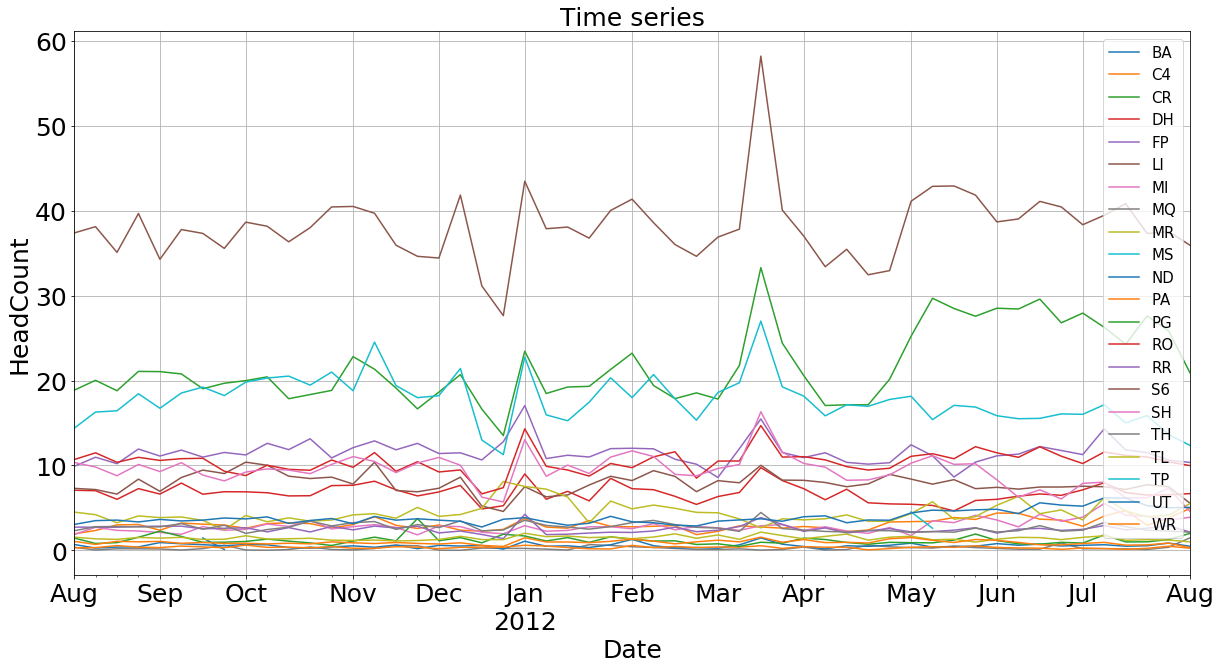

In [26]:
#Group the Data Frame Headcount_df by 'GameCode'
grouped = headcount_df.groupby(headcount_df['GameCode'])

#List of the Unique values from the GameCode column
w = headcount_df['GameCode'].unique()

# Code to create a dictionary for a variable called Group i (index) with the name of the game as value
d = {} #Empty Dictionary
for i in range(len(w)):
    d["group"+str(i)] = grouped.get_group(w[i])

# Plot a time plot for each of the groups created above in the same plot
ax = plt.figure(figsize=(20, 10)).gca() # define axis
#This creates each line for each particular group
for i in range(len(w)):
    d["group"+str(i)]['HeadCount'].resample("1W").mean().plot(label= w[i], ax = ax)
ax.set_xlabel('Date',fontsize=25)
ax.tick_params(axis="x", labelsize=25)
ax.tick_params(axis="y", labelsize=25)
ax.set_ylabel('HeadCount',fontsize=25)
ax.set_title('Time series',fontsize=25)
ax.legend(loc='upper right', fontsize=15)
ax.grid(True)

As it was seen before it is clear that the most popular game all year long is S6 followed by CR & TP

## Scatter Head Count Vs Tables (Occ, Open, Closed)

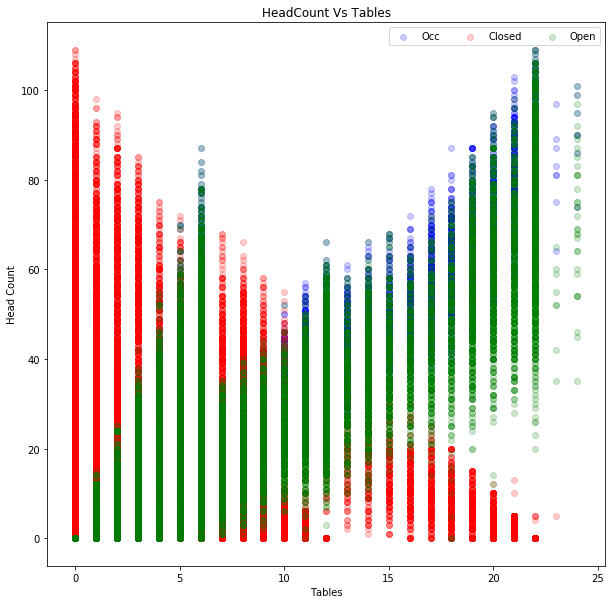

In [27]:
plt.figure(figsize=(10, 10))
a = plt.scatter(headcount_df['TablesOcc'], headcount_df['HeadCount'], alpha=0.2, c='Blue')
b = plt.scatter(headcount_df['TablesClosed'], headcount_df['HeadCount'], alpha=0.2, c='Red')
c = plt.scatter(headcount_df['TablesOpen'], headcount_df['HeadCount'], alpha=0.2, c='Green')
plt.legend((a, b, c),
           ('Occ', 'Closed', 'Open'),
           scatterpoints=1,
           loc='upper right',
           ncol=5,
           fontsize=10)
plt.xlabel('Tables')
plt.ylabel('Head Count')
plt.title('HeadCount Vs Tables')
plt.show()

As expected inverse relationship from Closed to Open

## Scatter Tables Occ Vs Tables Open (Hue: Hour bin)

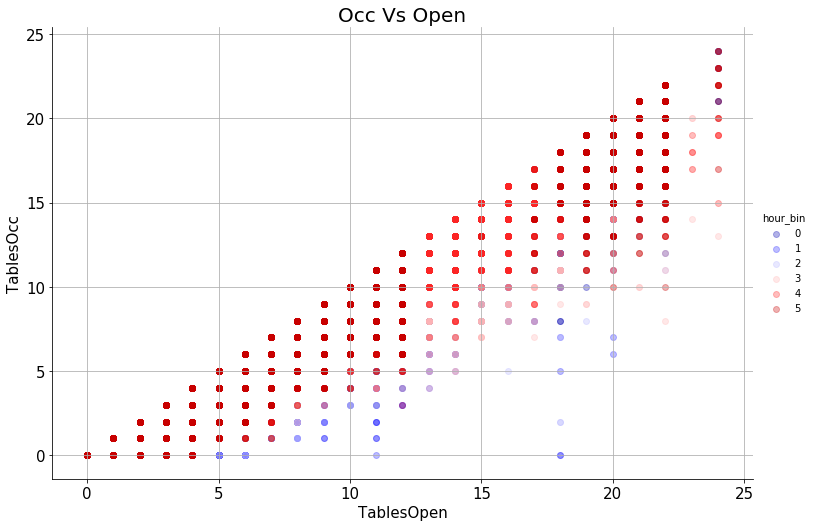

In [28]:
sns.lmplot(x = 'TablesOpen', y = 'TablesOcc', 
           data = headcount_df, 
           hue = "hour_bin", 
           palette="seismic", 
           scatter_kws={'alpha':0.3},height=7, aspect=1.5,
           fit_reg = False)
plt.xlabel('TablesOpen',fontsize = 15)
plt.ylabel('TablesOcc', fontsize = 15)
plt.title('Occ Vs Open', fontsize = 20)
plt.tick_params(axis="x", labelsize=15)
plt.tick_params(axis="y", labelsize=15)
plt.grid(True)

Usually we have 5 more tables Open than Occupied in Average 

# Conclusions/Summary:

**From the quick analysis done above it is possible to see some insights from the data:**
- The most popular days are Sundays & Mondays and the least popular days are Wednesdays & Thursdays
- The most popular games are: CR and TP and FP and the least popular games are: ND, PA & MQ
- As expected there is a constant difference between the number of Tables Open and the Number of Tables Occupied (this could be explore to maximize resources).
- The HeadCount at any give time is going to be concentrated in the 1-10 people range.